In [3]:
# Libraries
import pandas as pd


In [39]:
!git checkout -b "nelson"

Switched to a new branch 'nelson'


In [55]:
# Git
!git branch
!git coa "starting exploration | counting" && git poh

  main
* nelson
[nelson e1d7cb7] starting exploration | counting
 4 files changed, 397 insertions(+), 22 deletions(-)
 create mode 100644 .ipynb_checkpoints/nelson-journal-checkpoint.md
 create mode 100644 nelson-journal.md
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 12 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 56.26 KiB | 9.38 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Hmmsien/ECommerce_behavior.git
   429b0a1..e1d7cb7  HEAD -> nelson


## Visualization first million rows


In [5]:
df = pd.read_csv('data/2019-Nov.csv',nrows = 1000000)

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [7]:
df.shape

(1000000, 9)

In [8]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    316977
brand            147197
price                 0
user_id               0
user_session          0
dtype: int64

In [9]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(622161, 9)

# Looking at Groups (Categorizable)

In [10]:
event_group = df.groupby("event_type")
event_group.size()

event_type
cart         12736
purchase     12867
view        596558
dtype: int64

### User Behaviours

- Highest views
- view people with highest views 
- View people with highest purchases


In [11]:
user_group = df.groupby("user_id")
user_group.size()

user_id
274969076    3
275256741    1
295643776    8
296465302    2
321019934    1
            ..
566505596    1
566505617    2
566505649    1
566505735    1
566505856    1
Length: 121662, dtype: int64

<AxesSubplot:title={'center':'Users with most activity'}, ylabel='user_id'>

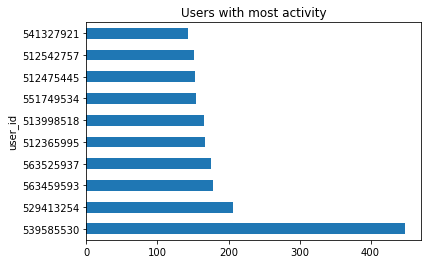

In [15]:
usercount = user_group["user_id"].count().sort_values(ascending=False)
usercount[:10].plot(kind="barh", title="Users with most activity")

<AxesSubplot:title={'center':'Users with highest spenditure'}, ylabel='user_id'>

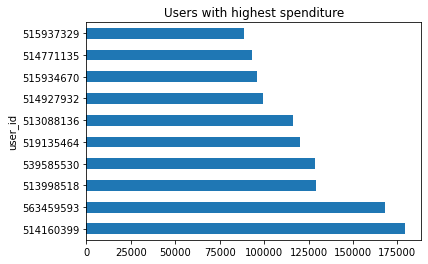

In [17]:
userspend = user_group["price"].sum().sort_values(ascending=False)
userspend[:10].plot(kind="barh", title="Users with highest spenditure")

<AxesSubplot:title={'center':'Users that viewed the most'}, ylabel='user_id'>

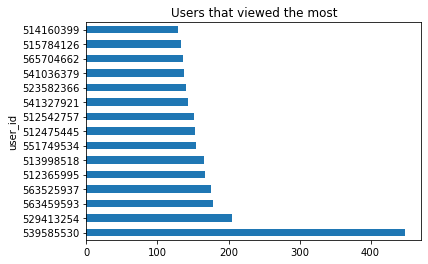

In [42]:
user_group_purchase = df[df["event_type"]=="view"].groupby("user_id")
userActView = user_group_purchase["user_id"].count().sort_values(ascending=False)
userActView[:15].plot(kind="barh", title="Users that viewed the most")

<AxesSubplot:title={'center':'Users that bought the most'}, ylabel='user_id'>

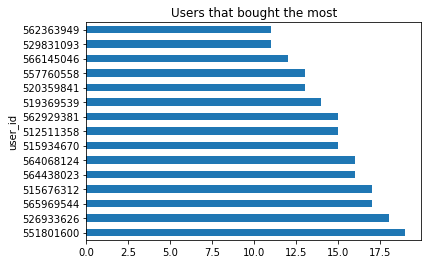

In [43]:
user_group_purchase = df[df["event_type"]=="purchase"].groupby("user_id")
userActPurchase = user_group_purchase["user_id"].count().sort_values(ascending=False)
userActPurchase[:15].plot(kind="barh", title="Users that bought the most")

In [44]:
type(userActPurchase)

pandas.core.series.Series

In [53]:
user_activity = pd.merge(userActPurchase, userActView, right_index=True, left_index= True)
user_activity.columns=["count_view", "count_purchase"]
user_activity.head()

,count_view,count_purchase
user_id,,
551801600,19,50
526933626,18,27
565969544,17,28
515676312,17,35
564438023,16,51


<AxesSubplot:xlabel='count_view', ylabel='count_purchase'>

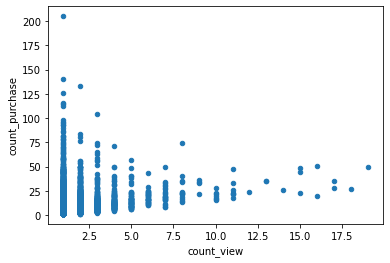

In [54]:
user_activity.plot.scatter(x="count_view", y="count_purchase")

### Visualization in sales 

In [19]:
product_gb = df.groupby("product_id")
product_gb.size()

product_id
1000978      11
1001588      47
1002098     151
1002099      97
1002100     148
           ... 
60500002     27
60500003      1
60500004      2
60500006      4
60500010      1
Length: 26921, dtype: int64

In [ ]:
product_gb.